In [41]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [5]:
df=pd.read_csv('LS_2.0.csv')
df.shape

(2263, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   STATE                                     2263 non-null   object 
 1   CONSTITUENCY                              2263 non-null   object 
 2   NAME                                      2263 non-null   object 
 3   WINNER                                    2263 non-null   int64  
 4   PARTY                                     2263 non-null   object 
 5   SYMBOL                                    2018 non-null   object 
 6   GENDER                                    2018 non-null   object 
 7   CRIMINAL
CASES                            2018 non-null   object 
 8   AGE                                       2018 non-null   float64
 9   CATEGORY                                  2018 non-null   object 
 10  EDUCATION                           

In [7]:
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


In [8]:
df.isnull().sum().sort_values(ascending=False)

CATEGORY                                     245
GENDER                                       245
LIABILITIES                                  245
ASSETS                                       245
EDUCATION                                    245
SYMBOL                                       245
AGE                                          245
CRIMINAL\nCASES                              245
CONSTITUENCY                                   0
NAME                                           0
WINNER                                         0
PARTY                                          0
TOTAL ELECTORS                                 0
OVER TOTAL VOTES POLLED \nIN CONSTITUENCY      0
GENERAL\nVOTES                                 0
POSTAL\nVOTES                                  0
TOTAL\nVOTES                                   0
OVER TOTAL ELECTORS \nIN CONSTITUENCY          0
STATE                                          0
dtype: int64

In [9]:
df[df['NAME']=='NOTA'].shape

(245, 19)

In [10]:
df = df.fillna({'CATEGORY':'NOT APPLICABLE',              
                'GENDER':'NOT APPLICABLE',               
                'LIABILITIES':'Rs 0',                
                'ASSETS':'Rs 0',
                'EDUCATION':'NOT APPLICABLE',
                'SYMBOL':'NO SYMBOL',
                'AGE':0.0,
                'CRIMINAL\nCASES':0,})

In [11]:
df.isnull().sum().sort_values(ascending=False)

TOTAL ELECTORS                               0
AGE                                          0
CONSTITUENCY                                 0
NAME                                         0
WINNER                                       0
PARTY                                        0
SYMBOL                                       0
GENDER                                       0
CRIMINAL\nCASES                              0
CATEGORY                                     0
OVER TOTAL VOTES POLLED \nIN CONSTITUENCY    0
EDUCATION                                    0
ASSETS                                       0
LIABILITIES                                  0
GENERAL\nVOTES                               0
POSTAL\nVOTES                                0
TOTAL\nVOTES                                 0
OVER TOTAL ELECTORS \nIN CONSTITUENCY        0
STATE                                        0
dtype: int64

# Visualising the Data

## Winners and their Eduacation qualifications

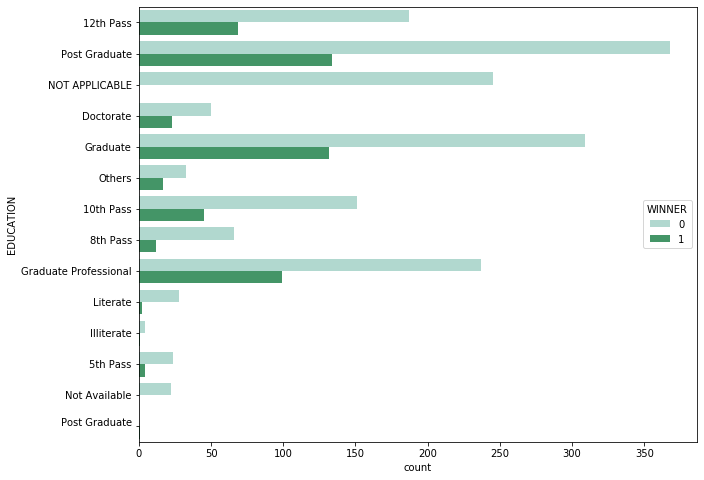

In [12]:
plt.figure(figsize=(10,8))
sns.countplot(y='EDUCATION',hue='WINNER',data=df,palette="BuGn")

## Most winners are Graduate or Post Graduate

In [13]:
df['EDUCATION']=df['EDUCATION'].replace(to_replace ="Post Graduate\n", value ="Post Graduate")

In [14]:
df['CRIMINAL\nCASES']=df['CRIMINAL\nCASES'].replace(to_replace ="Not Available", 
                 value ="0")
df['CRIMINAL\nCASES'] = df['CRIMINAL\nCASES'].astype(int)

In [15]:
#Checking if the candidate is criminal/ncase or not
for i in range(len(df)):
    if df.iloc[i,7]>0:
        df.iloc[i,7]='HAS CASE'
    else:
        df.iloc[i,7]='NO CASE'

## Criminal cases among winners and others

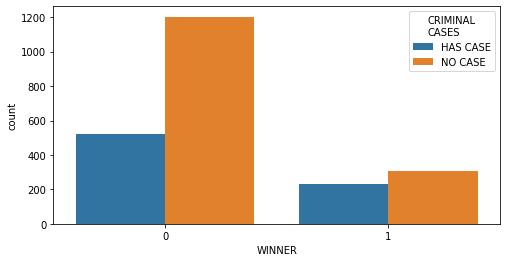

In [16]:
plt.figure(figsize=(8,4))
sns.countplot(x='WINNER',hue='CRIMINAL\nCASES',data=df)

## Genderwise criminal cases

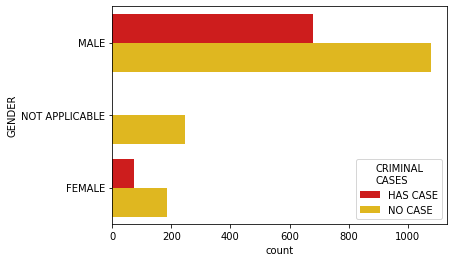

In [17]:
sns.countplot(y='GENDER',hue='CRIMINAL\nCASES',data=df,palette='hot')

## Assets

In [19]:
df[df['ASSETS']=='Not Available']

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
468,Bihar,BUXAR,Ramchandra Singh Yadav,0,IND,Almirah,MALE,NO CASE,42.0,GENERAL,Not Available,Not Available,Not Available,10721,9,10730,0.586540,1.087175,1829373
532,Tamil Nadu,CHIDAMBARAM,SIVAJOTHI M,0,NTK,Ganna Kisan,MALE,NO CASE,35.0,SC,Not Available,Not Available,Not Available,37329,142,37471,2.531445,3.246331,1480222
612,Uttar Pradesh,DEORIA,BINOD KUMAR JAISWAL,0,BSP,Elephant,MALE,NO CASE,56.0,GENERAL,Not Available,Not Available,Not Available,327728,2985,330713,18.852693,32.563441,1754195
613,Uttar Pradesh,DEORIA,NIYAZ AHMED,0,INC,Hand,MALE,NO CASE,57.0,GENERAL,Not Available,Not Available,Not Available,50749,307,51056,2.910509,5.027196,1754195
654,Tamil Nadu,DINDIGUL,"JOTHIMUTHU, K.",0,PMK,Mango,MALE,NO CASE,48.0,GENERAL,Not Available,Not Available,Not Available,206782,769,207551,13.460896,17.877979,1541881
656,Tamil Nadu,DINDIGUL,"MANSOORALI KHAN, A.",0,NTK,Ganna Kisan,MALE,NO CASE,56.0,GENERAL,Not Available,Not Available,Not Available,54574,383,54957,3.564283,4.733873,1541881
688,Andhra Pradesh,ELURU,PENTAPATI PULLARAO,0,JnP,Glass Tumbler,MALE,NO CASE,71.0,GENERAL,Not Available,Not Available,Not Available,76481,346,76827,4.816891,5.766884,1594950
972,Bihar,JAMUI (SC),UPENDRA RAVIDAS,0,BSP,Elephant,MALE,NO CASE,40.0,SC,Not Available,Not Available,Not Available,31504,107,31611,1.839117,3.329012,1718814
1033,Uttar Pradesh,KAISERGANJ,Vinay Kumar Pandey 'Vinnu',0,INC,Hand,MALE,NO CASE,54.0,GENERAL,Not Available,Not Available,Not Available,37049,83,37132,2.056097,3.780019,1805946
1052,Tamil Nadu,KALLAKURICHI,Sharfudeen S,0,NTK,Ganna Kisan,MALE,NO CASE,40.0,GENERAL,Not Available,Not Available,Not Available,30103,143,30246,1.978236,2.510177,1528938


In [27]:
for i in range(len(df)):
    if df.iloc[i,11]=='Not Available':
        df.iloc[i,11] = "-1"    

In [28]:
#Removing '\n ~' from ASSETS
df['ASSETS'] = df['ASSETS'].str.split('\n ~', 1, expand=True)[0]
#Removing 'Rs' from ASSETS
df['ASSETS'] = df['ASSETS'].str.split(expand=True)[1]
#Removing special charater "," and then joinig it
df['ASSETS']=df['ASSETS'].str.split(",").str.join(" ")
#Removing the space between the join
df['ASSETS']=df['ASSETS'].str.replace(' ', '')
#Converting ASSETS column into flaot as int values are very high
df['ASSETS'] = df['ASSETS'].astype(float)

AttributeError: Can only use .str accessor with string values!

In [29]:
df['ASSETS'] = df['ASSETS'].fillna(value = 0.0)

In [30]:
#Changing Assets into Different Economic Classes
STATUS = []
for i in df['ASSETS']:
    if i >0.0 and i < 500000.0:
        STATUS.append('NEAR TO BPL')
    if i >= 500000.0 and i <= 1000000.0:
        STATUS.append('LOWER CLASS')
    if i >= 1000001.0 and i <= 2500000.0:
        STATUS.append('LOWER MIDDLE CLASS')
    elif i >= 2500001.0 and i <= 10000000.0:
        STATUS.append('MIDDLE CLASS')
    elif i >= 10000001.0 and i <= 100000000.0:
        STATUS.append('UPPER MIDDLE CLASS')
    elif i >= 100000000.0 and i <= 250000000.0:
        STATUS.append('ELITE CLASS')
    elif i >= 250000001.0 and i <= 1000000000.0:
        STATUS.append('SUPER RICH')
    elif i >= 1000000001.0:
        STATUS.append('RICHEST OF RICH')
    elif i == -1.0:
        STATUS.append('ASSETS NOT MENTIONED')
    elif i == 0.0:
        STATUS.append('NO ASSETS')
df['STATUS'] = STATUS

## Criminal cases by Economic classes

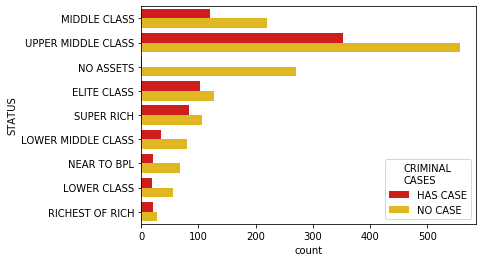

In [31]:
sns.countplot(y='STATUS',hue='CRIMINAL\nCASES',data=df,palette='hot')

In [32]:
print(df['PARTY'].nunique(),df['PARTY'].unique())

133 ['BJP' 'TRS' 'INC' 'NOTA' 'BSP' 'NCP' 'VBA' 'APoI' 'CPI(M)' 'BDJS' 'AITC'
 'RSP' 'SP' 'YSRCP' 'TDP' 'JnP' 'INLD' 'SBSP' 'IND' 'SHS' 'AAP' 'SAD'
 'JKN' 'JKPDP' 'JPC' 'DMK' 'PMK' 'NTK' 'MNM' 'AIADMK' 'RJD' 'CPI(ML)(L)'
 'SSD' 'PPA' 'JD(S)' 'NPEP' 'BMUP' 'BJD' 'AIMIM' 'HAMS' 'AHFBK' 'PPID'
 'SPL' 'ASDC' 'RLD' 'PSPL' 'JD(U)' 'BTP' 'AIFB' 'AGP' 'AIUDF' 'ABSKP'
 'PUNEKP' 'RTORP' 'JNJP' 'LTSP' 'RVNP' 'JANADIP' 'SDPI' 'DMDK' 'ABGP'
 'VCK' 'JMM' 'LIP' 'JDR' 'MOSP' 'MADP' 'AJPR' 'PMP' 'BBMP' 'AJSUP' 'JVM'
 'RMPOI' 'LJP' 'BJKVP' 'SWP' 'NEINDP' 'RSPSR' 'ravp' 'RSOSP' 'BLSP' 'WPOI'
 'SUCI(C)' 'SJDD' 'ANC' 'JDL' 'VSIP' 'AAM' 'JKP' 'BOPF' 'UPPL' 'CPIM'
 'GGP' 'KEC(M)' 'KEC' 'JAPL' 'AKBMP' 'TJS' 'IUML' 'BSCP' 'ADAL' 'BRPI'
 'MNF' 'PRISMP' 'VPI' 'YKP' 'NDPP' 'RLTP' 'RAHIS' 'NPF' 'BLSD' 'BVA'
 'NAWPP' 'AINRC' 'BNDl' 'MSHP' 'BARESP' 'BLRP' 'AIPF' 'WAP' 'VCSMP'
 'SAD(M)' 'UDP' 'SKM' 'SDF' 'PDP' 'JHP' 'TMC(M)' 'IPFT' 'JKNPP' 'DSSP'
 'AHNP' 'PHJSP']


In [33]:
#Using Groupby on Party with Total Votes(TO CHECK HIGHEST PERCENTAGE OF VOTES FOR TOP 10 PARTIES)
p = df.groupby('PARTY')['TOTAL\nVOTES']
X = ((p.sum()/df['TOTAL\nVOTES'].sum())*100).sort_values(ascending = False).head(10)
X

PARTY
BJP       38.526233
INC       20.096019
AITC       4.178796
BSP        3.501644
SP         2.627939
YSRCP      2.614598
CPI(M)     2.386397
DMK        2.335416
SHS        2.123538
TDP        2.106107
Name: TOTAL\nVOTES, dtype: float64

## vote share of top 10 parties

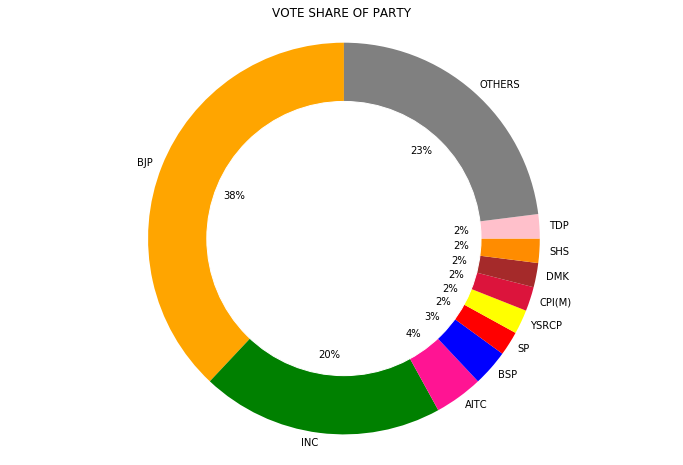

In [34]:
plt.rcParams['figure.figsize'] = (12,8)
labels = 'BJP', 'INC','AITC','BSP','SP','YSRCP','CPI(M)','DMK','SHS','TDP','OTHERS'
sizes = [38,20,4,3,2,2,2,2,2,2,23]
 
colors=('orange', 'green', 'deeppink', 'blue', 'red', 'yellow', 'crimson', 'brown','darkorange','pink','gray')

my_circle = plt.Circle((0, 0), 0.7, color='white')

d = plt.pie(sizes, labels=labels, autopct='%0.0f%%',
            startangle=90,colors=colors, labeldistance=1.05)
plt.axis('equal')
plt.gca().add_artist(my_circle)
plt.title('VOTE SHARE OF PARTY')            
plt.show()

In [35]:
df['AGE'].nunique()

61

## Seat share out of 539 seats

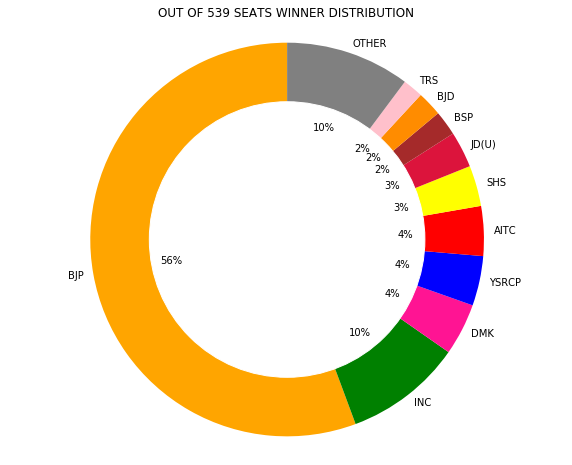

In [36]:
plt.rcParams['figure.figsize'] = (10,8)
labels = 'BJP','INC','DMK','YSRCP','AITC','SHS','JD(U)','BSP','BJD','TRS','OTHER'
sizes = [300, 52, 23, 22, 22, 18, 16, 11, 11, 9,55]
 
colors=('orange', 'green', 'deeppink', 'blue', 'red', 'yellow', 'crimson', 'brown','darkorange','pink','gray')

my_circle = plt.Circle((0, 0), 0.7, color='white')

d = plt.pie(sizes, labels=labels, autopct='%0.0f%%',
            startangle=90,colors=colors, labeldistance=1.05)
plt.axis('equal')
plt.gca().add_artist(my_circle)
plt.title('OUT OF 539 SEATS WINNER DISTRIBUTION')            
plt.show()

## Number of constituencies in each state

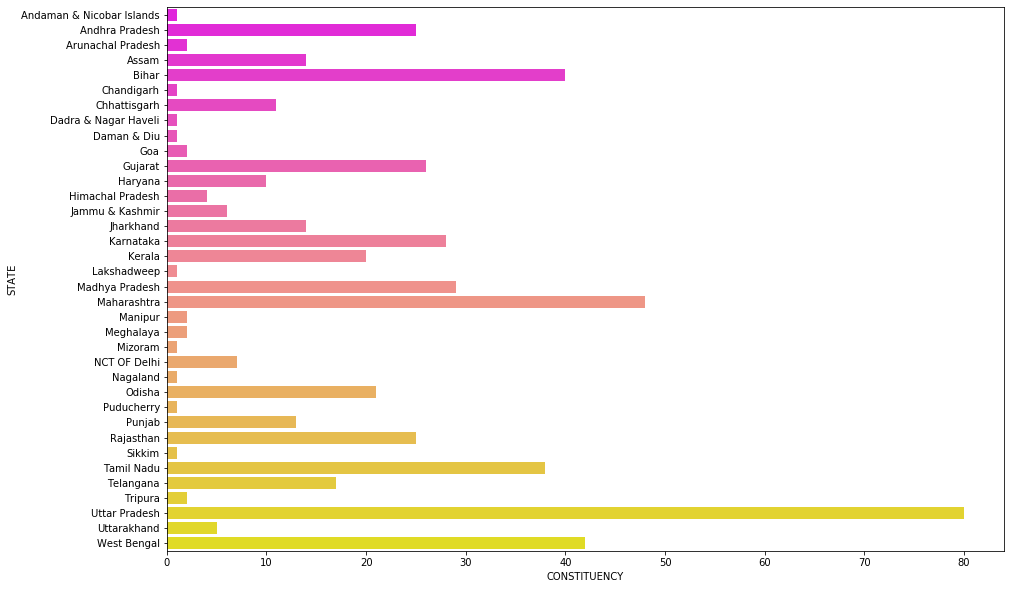

In [37]:
p = df.groupby('STATE')['CONSTITUENCY'].nunique().reset_index()
plt.figure(figsize=(15,10))
sns.barplot(y='STATE',x='CONSTITUENCY',data=p,palette='spring')

## Partywise winner by education and gender

In [42]:
p = df.groupby(['PARTY','EDUCATION','GENDER'])['WINNER'].sum().reset_index().sort_values('WINNER',ascending = False)
p = p[p['WINNER']!=0]
fig = px.bar(p, x='EDUCATION', y='WINNER',hover_data =['PARTY'], color='GENDER', height=650)
fig.show()

## Counting Partywise winners in various states

In [43]:
p = df.groupby(['PARTY','STATE']).sum().reset_index().sort_values('PARTY',ascending =True)
fig = px.bar(p, x='STATE', y='WINNER',hover_data =['PARTY'], color='PARTY', height=650)
fig.show()

## Age groups

In [45]:
#Creating Age_Group from Age column
AGE_GROUP = []
for i in df['AGE']:
    if i >= 24 and i <=35:
        AGE_GROUP.append('YOUNG AGE')
    elif i >= 36 and i<=60:
        AGE_GROUP.append('MIDDLE AGE')
    elif i >=60:
        AGE_GROUP.append('OLD AGE')
    else:
        AGE_GROUP.append('NOT KNOWN')
df['AGE_GROUP'] = AGE_GROUP

In [46]:
p = df.groupby(['PARTY','AGE_GROUP'])['WINNER'].sum().reset_index().sort_values('WINNER',ascending = False)
p = p[p['WINNER']!=0]
fig = px.bar(p, x='PARTY',y='WINNER',hover_data =['AGE_GROUP'], color='AGE_GROUP', height=650)
fig.show()

## Partywise Gender

In [49]:
p = df.groupby(['PARTY','GENDER'])['WINNER'].count().reset_index().sort_values('WINNER',ascending = False)
p = p[p['WINNER']!=0]
fig = px.bar(p, x='PARTY',y='WINNER',hover_data =['GENDER'], color='GENDER', height=700)
fig.show()

## Partywise criminal cases

In [50]:
p = df.groupby(['PARTY','CRIMINAL\nCASES'])['WINNER'].sum().reset_index().sort_values('WINNER',ascending = False)
p = p[p['WINNER']!=0]
fig = px.bar(p, x='PARTY',y='WINNER',hover_data =['CRIMINAL\nCASES'], color='CRIMINAL\nCASES', height=750)
fig.show()

# Applying Machine Learning

In [51]:
from sklearn.preprocessing import LabelEncoder
labelEncoder_X = LabelEncoder()
df['STATE'] = labelEncoder_X.fit_transform(df['STATE'])
df['CONSTITUENCY'] = labelEncoder_X.fit_transform(df['CONSTITUENCY'])
df['NAME'] = labelEncoder_X.fit_transform(df['NAME'])
df['PARTY'] = labelEncoder_X.fit_transform(df['PARTY'])
df['SYMBOL'] = labelEncoder_X.fit_transform(df['SYMBOL'])
df['GENDER'] = labelEncoder_X.fit_transform(df['GENDER'])
df['CRIMINAL\nCASES'] = labelEncoder_X.fit_transform(df['CRIMINAL\nCASES'])
df['CATEGORY'] = labelEncoder_X.fit_transform(df['CATEGORY'])
df['EDUCATION'] = labelEncoder_X.fit_transform(df['EDUCATION'])
df['STATUS'] = labelEncoder_X.fit_transform(df['STATUS'])
df['AGE_GROUP'] = labelEncoder_X.fit_transform(df['AGE_GROUP'])

In [52]:
X=df.drop(['WINNER','ASSETS','LIABILITIES','GENERAL\nVOTES','POSTAL\nVOTES','AGE','OVER TOTAL ELECTORS \nIN CONSTITUENCY','OVER TOTAL VOTES POLLED \nIN CONSTITUENCY'],axis=1)
y=df['WINNER']

In [62]:
X.shape, y.shape

((2263, 13), (2263,))

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [54]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [56]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.9101620029455081
[[464  26]
 [ 35 154]]


## Using NN

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1)

print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1629, 13) (181, 13) (453, 13) (1629,) (181,) (453,)


In [69]:
from keras.models import Sequential
from keras.layers import Dense

In [70]:
model1 = Sequential()
model1.add(Dense(32,activation = 'relu', input_shape= (13,)))
model1.add(Dense(32,activation = 'relu'))
model1.add(Dense(1, activation = 'sigmoid'))

model1.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics=['accuracy'])

In [71]:
hist1 = model1.fit(X_train, Y_train, 
                  batch_size=32, epochs=200, validation_data=(X_val, Y_val))

cy: 0.7667 - val_loss: 0.5942 - val_accuracy: 0.7238
Epoch 66/200
1629/1629 [==============================] - 0s 64us/step - loss: 0.5432 - accuracy: 0.7667 - val_loss: 0.5942 - val_accuracy: 0.7238
Epoch 67/200
1629/1629 [==============================] - 0s 62us/step - loss: 0.5432 - accuracy: 0.7667 - val_loss: 0.5942 - val_accuracy: 0.7238
Epoch 68/200
1629/1629 [==============================] - 0s 61us/step - loss: 0.5432 - accuracy: 0.7667 - val_loss: 0.5942 - val_accuracy: 0.7238
Epoch 69/200
1629/1629 [==============================] - 0s 61us/step - loss: 0.5432 - accuracy: 0.7667 - val_loss: 0.5943 - val_accuracy: 0.7238
Epoch 70/200
1629/1629 [==============================] - 0s 63us/step - loss: 0.5432 - accuracy: 0.7667 - val_loss: 0.5943 - val_accuracy: 0.7238
Epoch 71/200
1629/1629 [==============================] - 0s 61us/step - loss: 0.5432 - accuracy: 0.7667 - val_loss: 0.5943 - val_accuracy: 0.7238
Epoch 72/200
1629/1629 [==============================] - 0s 60us

In [72]:
score = model1.evaluate(X_test,Y_test)
print("Loss: ", score[0])
print("Accuracy: ", score[1])

453/453 [==============================] - 0s 55us/step
Loss:  0.5519402753438382
Accuracy:  0.759381890296936
